# Loan Approval Prediction using Python

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Load Dataset

In [2]:
df=pd.read_csv("loan_approval.csv")

In [3]:
df.head()

Applicant_ID  Applicant_Income  ...  Employer_Category Loan_Approved
0           1.0           17795.0  ...            Private            No
1           2.0            2860.0  ...            Private            No
2           3.0            7390.0  ...         Government           Yes
3           4.0           13964.0  ...         Government            No
4           5.0           13284.0  ...            Private           Yes

[5 rows x 20 columns]

In [4]:
df=df.drop("Applicant_ID", axis=1)

In [5]:
df.head()

Applicant_Income  Coapplicant_Income  ... Employer_Category  Loan_Approved
0           17795.0              1387.0  ...           Private             No
1            2860.0              2679.0  ...           Private             No
2            7390.0              2106.0  ...        Government            Yes
3           13964.0              8173.0  ...        Government             No
4           13284.0              4223.0  ...           Private            Yes

[5 rows x 19 columns]

In [6]:
df.isnull().sum()

Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [7]:
print(df.describe())

       Applicant_Income  Coapplicant_Income  ...   Loan_Amount   Loan_Term
count        950.000000          950.000000  ...    950.000000  950.000000
mean       10852.571579         5082.455789  ...  20522.825263   48.000000
std         5061.632859         2943.161570  ...  11504.142575   24.245322
min         2009.000000            1.000000  ...   1015.000000   12.000000
25%         6730.750000         2472.750000  ...   9806.250000   24.000000
50%        10548.000000         5205.500000  ...  21210.500000   48.000000
75%        15190.000000         7620.750000  ...  30263.000000   72.000000
max        19988.000000         9996.000000  ...  39995.000000   84.000000

[8 rows x 11 columns]


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    950 non-null    float64
 1   Coapplicant_Income  950 non-null    float64
 2   Employment_Status   950 non-null    object 
 3   Age                 950 non-null    float64
 4   Marital_Status      950 non-null    object 
 5   Dependents          950 non-null    float64
 6   Credit_Score        950 non-null    float64
 7   Existing_Loans      950 non-null    float64
 8   DTI_Ratio           950 non-null    float64
 9   Savings             950 non-null    float64
 10  Collateral_Value    950 non-null    float64
 11  Loan_Amount         950 non-null    float64
 12  Loan_Term           950 non-null    float64
 13  Loan_Purpose        950 non-null    object 
 14  Property_Area       950 non-null    object 
 15  Education_Level     950 non-null    object 
 16  Gender 

## Handle Missing Values

In [9]:
categorical_col=df.select_dtypes(include=['object']).columns
numerical_col=df.select_dtypes(include=['int64','float64']).columns

In [10]:
categorical_col

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [11]:
numerical_col

Index(['Applicant_Income', 'Coapplicant_Income', 'Age', 'Dependents',
       'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [12]:
from sklearn.impute import SimpleImputer
num_imputer=SimpleImputer(strategy='median')
df[numerical_col]=num_imputer.fit_transform(df[numerical_col])

In [13]:
from sklearn.impute import SimpleImputer
cat_imputer=SimpleImputer(strategy='most_frequent')
df[categorical_col]=cat_imputer.fit_transform(df[categorical_col])

In [14]:
df.isnull().sum()

Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

## Exploratory Data Analysis

In [15]:
print(df['Loan_Approved'].value_counts())

Loan_Approved
No     702
Yes    298
Name: count, dtype: int64


In [16]:
import plotly.express as px

loan_status_count=df['Loan_Approved'].value_counts().reset_index()
loan_status_count.columns=["Loan_approved",'count']

# plot the pie chart
fig_loan_status=px.pie(loan_status_count, names='Loan_approved', values='count', title='Loan Status Distribution')

fig_loan_status.show()

In [ ]:
gender_count=df['Gender'].value_counts()
fig_gender=px.bar(gender_count,x=gender_count.index, y=gender_count.values,title='Gender distribution')

fig_gender.show()

In [ ]:
marital_count=df['Marital_Status'].value_counts()
fig_gender=px.bar(marital_count,x=marital_count.index, y=marital_count.values,title='Marital status distribution')

fig_gender.show()

In [ ]:
fig_applicant_income=px.histogram(df,x='Applicant_Income',title='Applicant Income Distribution')

fig_applicant_income.show()

In [ ]:
fig_coapplicant_income=px.histogram(df,x='Coapplicant_Income',title='Coapplicant Income Distribution')

fig_coapplicant_income.show()

In [ ]:
fig_income=px.box(df,x='Loan_Approved',y='Applicant_Income', color="Loan_Approved",title='Loan Approved vs Applicant Income')

fig_income.show()

In [ ]:
fig_credit_score=px.histogram(df, x='Credit_Score', color='Loan_Approved',barmode='group',title='Loan Approved vs Credit_score')
fig_credit_score.show()

## Encoding variables

In [17]:
df.head()

Applicant_Income  Coapplicant_Income  ... Employer_Category  Loan_Approved
0           17795.0              1387.0  ...           Private             No
1            2860.0              2679.0  ...           Private             No
2            7390.0              2106.0  ...        Government            Yes
3           13964.0              8173.0  ...        Government             No
4           13284.0              4223.0  ...           Private            Yes

[5 rows x 19 columns]

In [18]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encode=LabelEncoder()
for col in ["Marital_Status","Gender","Loan_Approved"]:
  if col in df.columns:
    df[col]=label_encode.fit_transform(df[col])

In [20]:
df.head()

Applicant_Income  Coapplicant_Income  ... Employer_Category  Loan_Approved
0           17795.0              1387.0  ...           Private              0
1            2860.0              2679.0  ...           Private              0
2            7390.0              2106.0  ...        Government              1
3           13964.0              8173.0  ...        Government              0
4           13284.0              4223.0  ...           Private              1

[5 rows x 19 columns]

In [21]:
df=pd.get_dummies(df,columns=[
    "Employment_Status",
    "Property_Area",
    "Education_Level",
    "Loan_Purpose",
    "Employer_Category"
],drop_first=True)

In [22]:
df.head()

Applicant_Income  ...  Employer_Category_Unemployed
0           17795.0  ...                         False
1            2860.0  ...                         False
2            7390.0  ...                         False
3           13964.0  ...                         False
4           13284.0  ...                         False

[5 rows x 28 columns]

## Correlation Heatmap

Loan_Approved         1.000000
Credit_Score          0.451235
Applicant_Income      0.120177
Marital_Status        0.030182
Collateral_Value      0.021709
Coapplicant_Income    0.003957
Savings              -0.013462
Dependents           -0.018999
Age                  -0.022354
Existing_Loans       -0.035101
Gender               -0.054342
Loan_Term            -0.086644
Loan_Amount          -0.126608
DTI_Ratio            -0.444766
Name: Loan_Approved, dtype: float64


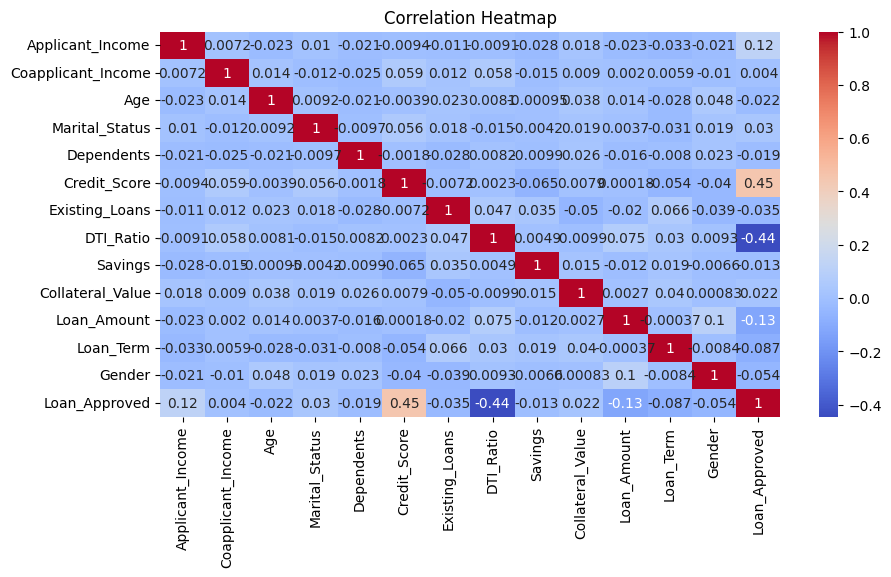

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df=df.select_dtypes(include=['float64','int64'])
corr=numeric_df.corr()["Loan_Approved"].sort_values(ascending=False)
print(corr)

plt.figure(figsize=(10,5))
sns.heatmap(numeric_df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Training Loan Approval Prediction Model

In [31]:
df

Applicant_Income  ...  Employer_Category_Unemployed
0             17795.0  ...                         False
1              2860.0  ...                         False
2              7390.0  ...                         False
3             13964.0  ...                         False
4             13284.0  ...                         False
..                ...  ...                           ...
995           10548.0  ...                          True
996            3279.0  ...                         False
997           15192.0  ...                         False
998            9083.0  ...                         False
999           13093.0  ...                         False

[1000 rows x 28 columns]

In [28]:
X=df.drop("Loan_Approved",axis=1)
y=df["Loan_Approved"]

In [29]:
X

Applicant_Income  ...  Employer_Category_Unemployed
0             17795.0  ...                         False
1              2860.0  ...                         False
2              7390.0  ...                         False
3             13964.0  ...                         False
4             13284.0  ...                         False
..                ...  ...                           ...
995           10548.0  ...                          True
996            3279.0  ...                         False
997           15192.0  ...                         False
998            9083.0  ...                         False
999           13093.0  ...                         False

[1000 rows x 27 columns]

In [30]:
y

0      0
1      0
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: Loan_Approved, Length: 1000, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

### Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [35]:
X_train_scaled

array([[-1.41039098,  1.12015367, -1.27264814, ..., -0.41733475,
        -0.86266219, -0.31448545],
       [ 1.73380125,  0.65453244,  0.01054048, ..., -0.41733475,
        -0.86266219, -0.31448545],
       [-0.64540315,  0.64674258,  1.56869809, ..., -0.41733475,
        -0.86266219, -0.31448545],
       ...,
       [-0.23021574,  0.36489125, -0.81436649, ..., -0.41733475,
         1.15920231, -0.31448545],
       [ 1.11944422, -0.46260443,  1.20207277, ..., -0.41733475,
        -0.86266219, -0.31448545],
       [-1.74996214,  0.02390779,  0.01054048, ...,  2.39615797,
        -0.86266219, -0.31448545]])

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Training Models

In [37]:
log_model=LogisticRegression(max_iter=1000,random_state=42)
log_model.fit(X_train_scaled,y_train)
log_pred=log_model.predict(X_test_scaled)

In [38]:
svm_model=SVC(kernel="rbf",probability=True,random_state=42)
svm_model.fit(X_train_scaled,y_train)
svm_pred=svm_model.predict(X_test_scaled)

In [40]:
rf_model=RandomForestClassifier(n_estimators=200,random_state=42)
rf_model.fit(X_train_scaled,y_train)
rf_pred=rf_model.predict(X_test_scaled)

### Evaluates Models

In [41]:
models={
    "Logistic Regression":(y_test,log_pred),
    "Support Vector Machine":(y_test,svm_pred),
    "Random Forest":(y_test,rf_pred)
}

accuracy_scores={}

In [42]:
for model_name, (y_true,y_pred) in models.items():
  acc=accuracy_score(y_true,y_pred)
  accuracy_scores[model_name]=acc
  print(f"{model_name} Accuracy: {acc}")
  print("Confusion Matrix:")
  print(confusion_matrix(y_true,y_pred))
  print("Classification Report:")
  print(classification_report(y_true,y_pred))
  print("\n")

Logistic Regression Accuracy: 0.84
Confusion Matrix:
[[249  20]
 [ 44  87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       269
           1       0.81      0.66      0.73       131

    accuracy                           0.84       400
   macro avg       0.83      0.79      0.81       400
weighted avg       0.84      0.84      0.84       400



Support Vector Machine Accuracy: 0.83
Confusion Matrix:
[[256  13]
 [ 55  76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       269
           1       0.85      0.58      0.69       131

    accuracy                           0.83       400
   macro avg       0.84      0.77      0.79       400
weighted avg       0.83      0.83      0.82       400



Random Forest Accuracy: 0.8975
Confusion Matrix:
[[254  15]
 [ 26 105]]
Classification Report:
              precision    recall  f1-score   

### Best Model Selection

In [43]:
best_model=max(accuracy_scores,key=accuracy_scores.get)
print(f"Best Model: {best_model}")

Best Model: Random Forest


### Important Features

In [44]:
importances=rf_model.feature_importances_

In [45]:
importances

array([0.0814085 , 0.04372533, 0.03771125, 0.00691416, 0.01575598,
       0.26492653, 0.01513426, 0.26822134, 0.0418044 , 0.04095854,
       0.06326394, 0.03527757, 0.00762017, 0.00725662, 0.00557714,
       0.00234268, 0.00531102, 0.00684575, 0.00692037, 0.00568165,
       0.0046813 , 0.00619083, 0.00499109, 0.00525388, 0.00591929,
       0.00627829, 0.00402815])

In [46]:
importance_df=pd.DataFrame({
    "Feature":X.columns,
    "Importance":importances
}).sort_values(by="Importance",ascending=False)

In [48]:
importance_df.head()

Feature  Importance
7            DTI_Ratio    0.268221
5         Credit_Score    0.264927
0     Applicant_Income    0.081408
10         Loan_Amount    0.063264
1   Coapplicant_Income    0.043725